In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from scipy.signal import get_window
import glob
import time

def plot_scatter_func(x, y, label, title, xlab, ylab, x1 = None, x2 = None, y1 = None, y2 = None):

    f, ax = plt.subplots(figsize = (20, 10))
    ax.scatter(x, y, label = label)
    ax.set_title(title, fontsize = 30)
    ax.set_xlabel(xlab, fontsize = 30)
    ax.set_ylabel(ylab, fontsize = 30)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.set_xlim(x1, x2)
    ax.set_ylim(y1, y2)
    ax.legend(loc = 'best', fontsize = 20)
    ax.grid(True)

    return f

def phase_func(Y):
    phases = np.angle(Y) * 180 / np.pi
    
    return phases

#dBu = 20log10(V/0.775V)

#Why the windowing? The FFT assumes that the signal is periodic and continuous within the window. 
#If the signal is not perfectly periodic, it can cause spectral leakage, which results in an offset or differences in the frequency spectrum.

def rfft(y, cnv): #this function computes the fft of y
    #window = get_window("hanning", len(y))
    #window = 1
    #y_windowed = y * window
    if np.isnan(y).any():
        nan_indices = np.where(np.isin(y))[0]
        print(f"Input data contains NaN values in {nan_indices}.")
        
    if np.isinf(y).any():
        print("Input data contains Inf values.")
        
    N = len(y)
    print(f"y_windowed: {y}")
    Y = fft.rfft(y)
    print(f"Y: {Y}")
    phases = phase_func(Y)
    print(phases)
    Y_normalized = np.abs(Y) / N
    Y_dBu = 20*(np.log10(np.abs(Y_normalized)  * cnv / 0.775 ))
        
    return Y_dBu, phases

In [104]:
hour = '16.07'
day = '08082024'

# Method A: Phases of the average of the waveforms

### compute and plot the average of the waveforms

In [105]:
file_pattern = f"../Waveforms/{day}/{day}_{hour}/{day}_{hour}_wf.csv/{day}_{hour}_wf_*.csv"
file_list = glob.glob(file_pattern)

amplitudes_list_A = []

if not file_list:
    print("No files found for the given pattern.")
else:
    for i, file in enumerate(file_list):
        df = pd.read_csv(file)
        if i == 0:
            print(df.iloc[:, 0])
            print(df.iloc[:, 1])
            times_A = pd.to_numeric(df.iloc[1:, 0], errors = 'coerce').values #The argument errors='coerce' specifies that any non-numeric values encountered during the conversion should be replaced with NaN (Not a Number)
        amplitudes_A = pd.to_numeric(df.iloc[1:, 1], errors='coerce').values
        if np.isnan(amplitudes_A).any():
            nan_indices = np.where(np.isnan(amplitudes_A))[0]
            print(f"Input data contains NaN values in {nan_indices} at {i} file.")
            #amplitudes_A[nan_indices] = 0
 
        amplitudes_list_A.append(amplitudes_A)

all_amplitudes_A = np.stack(amplitudes_list_A, axis = 0)
print(all_amplitudes_A)

0               (us)
1         0.00000000
2         0.00080000
3         0.00160000
4         0.00240000
            ...     
62500    49.99920067
62501    50.00000067
62502    50.00080067
62503    50.00160067
62504    50.00240067
Name: Time, Length: 62505, dtype: object
0               (mV)
1        -2.36220500
2        -2.36220500
3        -2.36220500
4        -1.57480300
            ...     
62500     1.18110200
62501     0.78740150
62502     0.39370070
62503     1.18110200
62504     1.96850400
Name: Channel D, Length: 62505, dtype: object
[[-2.362205  -2.362205  -2.362205  ...  0.3937007  1.181102   1.968504 ]
 [ 2.362205   2.362205   2.755905  ...  5.511811   5.11811    3.937008 ]
 [ 6.299212   6.692913   6.692913  ...  7.874015   7.480314   6.299212 ]
 ...
 [ 3.149606   2.362205   1.574803  ...  4.330709   3.937008   4.330709 ]
 [ 5.511811   6.692913   7.480314  ...  2.362205   2.362205   2.755905 ]
 [ 3.937008   7.086614   8.267716  ... -2.362205  -1.574803  -0.3937007]]


In [106]:
#The ADC of the Picoscope only represents discrete levels of input voltage in 8 bit resolution
conversion_factor = 0.001

avg_wf = np.mean(all_amplitudes_A, axis=0)

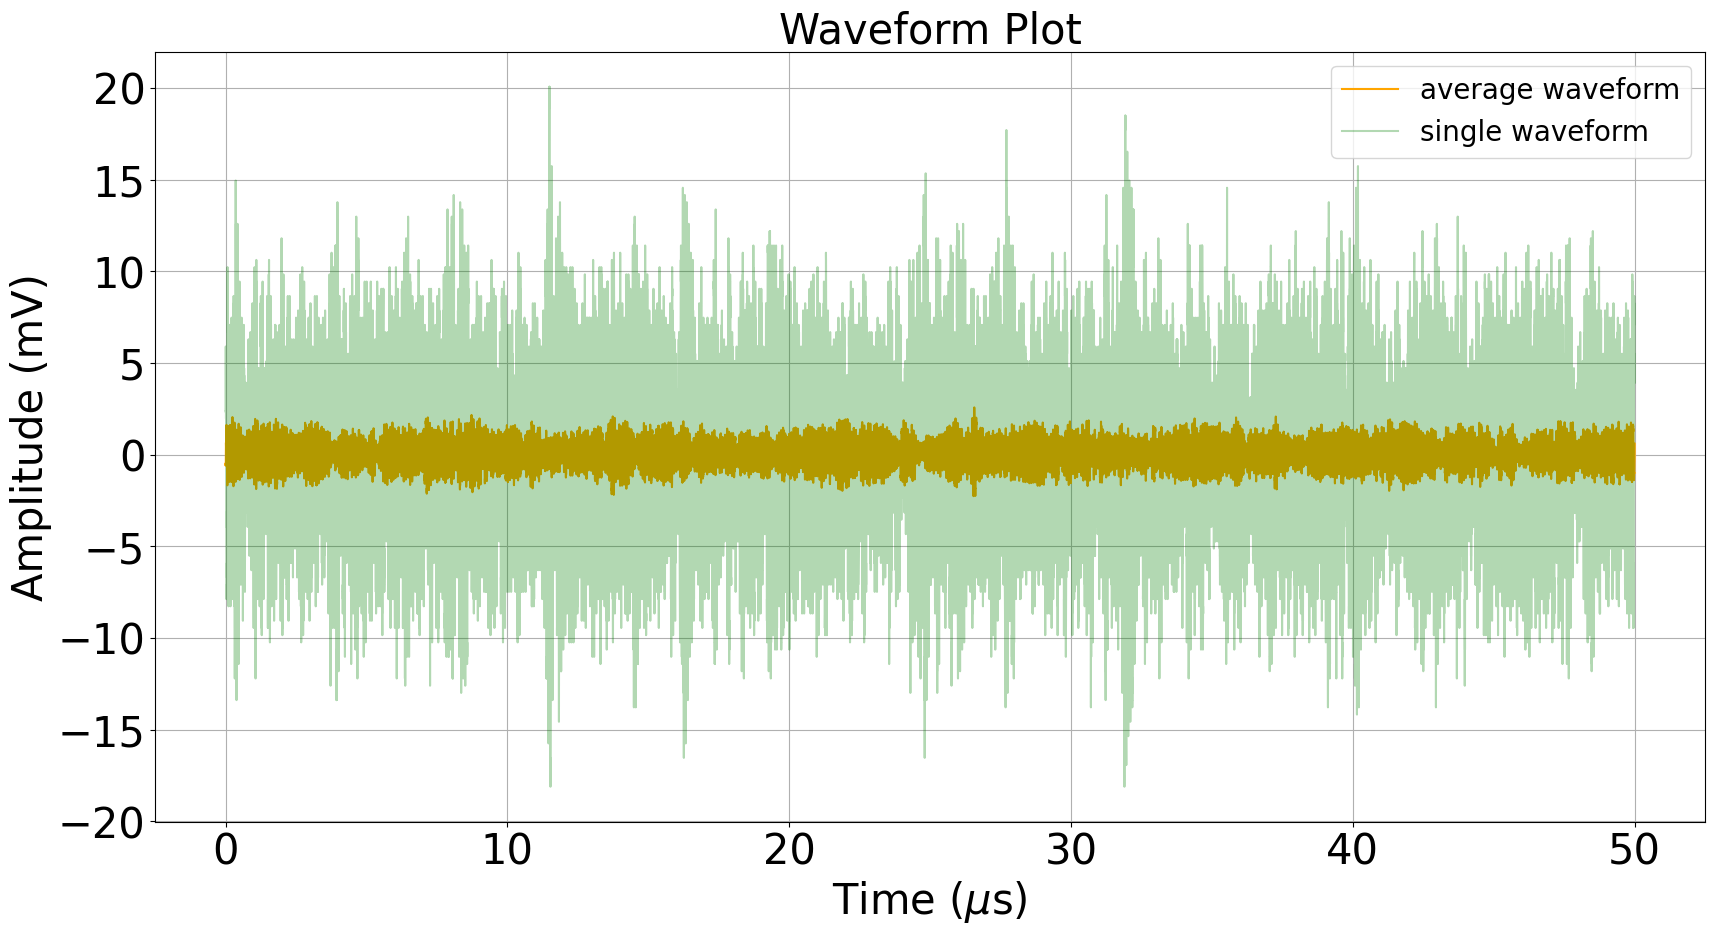

In [107]:
plt.figure(figsize=(20, 10))
#plt.errorbar(times_A, A, yerr=stds_wf, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1, label = f"{hour}_{day}")
plt.plot(times_A, avg_wf, color = 'orange', label = 'average waveform')

plt.plot(times_A, all_amplitudes_A[1, :], alpha = 0.3, color = 'green', label = 'single waveform')

plt.title('Waveform Plot', fontsize = 30)
plt.xlabel(r'Time ($\mu$s)', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude (mV)', fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend(loc = "best",  prop={'size': 20})
plt.grid(True)
plt.show()

### compute and plot the phases of the average waveform

f_s_A = [1250.01998229]
y_windowed: [-0.56594486 -0.47982276 -0.45521649 ...  0.19069874  0.36909454
  0.60285431]
Y: [ 3.60445325e+03 +0.j          2.78900303e+01+25.92751889j
  2.35498596e+01 -3.929509j   ... -2.19250754e+00 -1.68971089j
 -5.19423272e+00 -8.52466857j  5.30142727e+01 +0.j        ]
[   0.           42.91157677   -9.47305099 ... -142.37945508 -121.35469737
    0.        ]
y_windowed: [2.362205 2.362205 2.755905 ... 5.511811 5.11811  3.937008]
Y: [2926.3778506   +0.j          149.56572238 +27.25114928j
  101.18925869+127.74544164j ...   30.08359034 -24.57725696j
   -7.35910867 +78.430855j    -58.6615224   +0.j        ]
[  0.          10.3261234   51.61667806 ... -39.24763878  95.36032641
 180.        ]
[ -82.56740233 -122.09024062 -126.14516038 ... -144.86064853 -133.71941603
 -119.21633412]


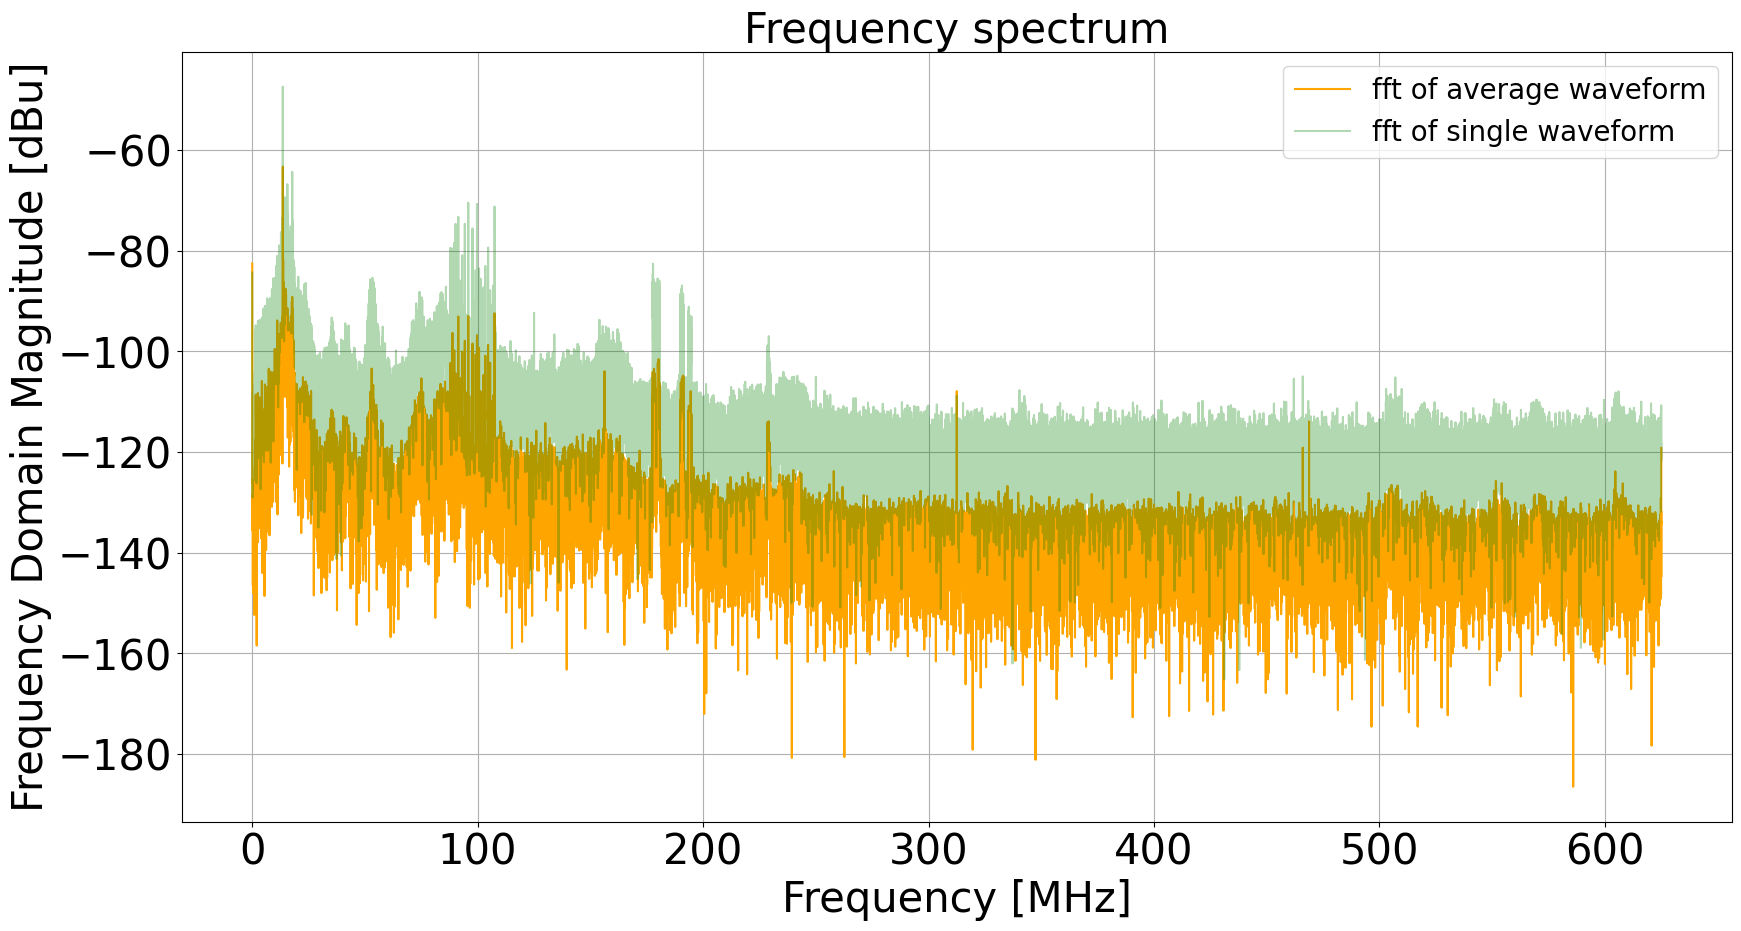

Execution time: 1.5950634479522705 seconds


In [108]:
span_A = times_A[-1:]
f_s_A = len(times_A) / span_A
print(f"f_s_A = {f_s_A}")
freqs_A = fft.rfftfreq(len(avg_wf), 1/f_s_A) #window lenght, sample spacing

#plot the fft and see how much time it takes
start_time = time.time()

Y_dBu_A, phases_A = rfft(avg_wf, conversion_factor)
Y_dBu_single_wf_A, phases_single_wf_A = rfft(all_amplitudes_A[1, :], conversion_factor)

plt.figure(figsize = (20, 10))
#plt.errorbar(freqs_A, Y_dBu, yerr = Y_err_dBu, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
print(Y_dBu_A) #NAN
plt.plot(freqs_A, Y_dBu_A, color = 'orange', label = 'fft of average waveform')
plt.plot(freqs_A, Y_dBu_single_wf_A, alpha = 0.3, color = 'green', label = 'fft of single waveform')

plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [dBu]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
#plt.semilogx()
plt.legend(fontsize = 20)
plt.show()

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

In [109]:
offset_blue = np.mean(Y_dBu_A[(freqs_A >= 250) & (freqs_A <= 350)])
offset_orange = np.mean(Y_dBu_single_wf_A[(freqs_A >= 250) & (freqs_A <= 350)])
print(f"offset blue: {offset_blue} - offset orange: {offset_orange} = {offset_blue - offset_orange}")
diff = offset_blue - offset_orange

offset blue: -138.94631496824388 - offset orange: -120.81376007340646 = -18.132554894837426


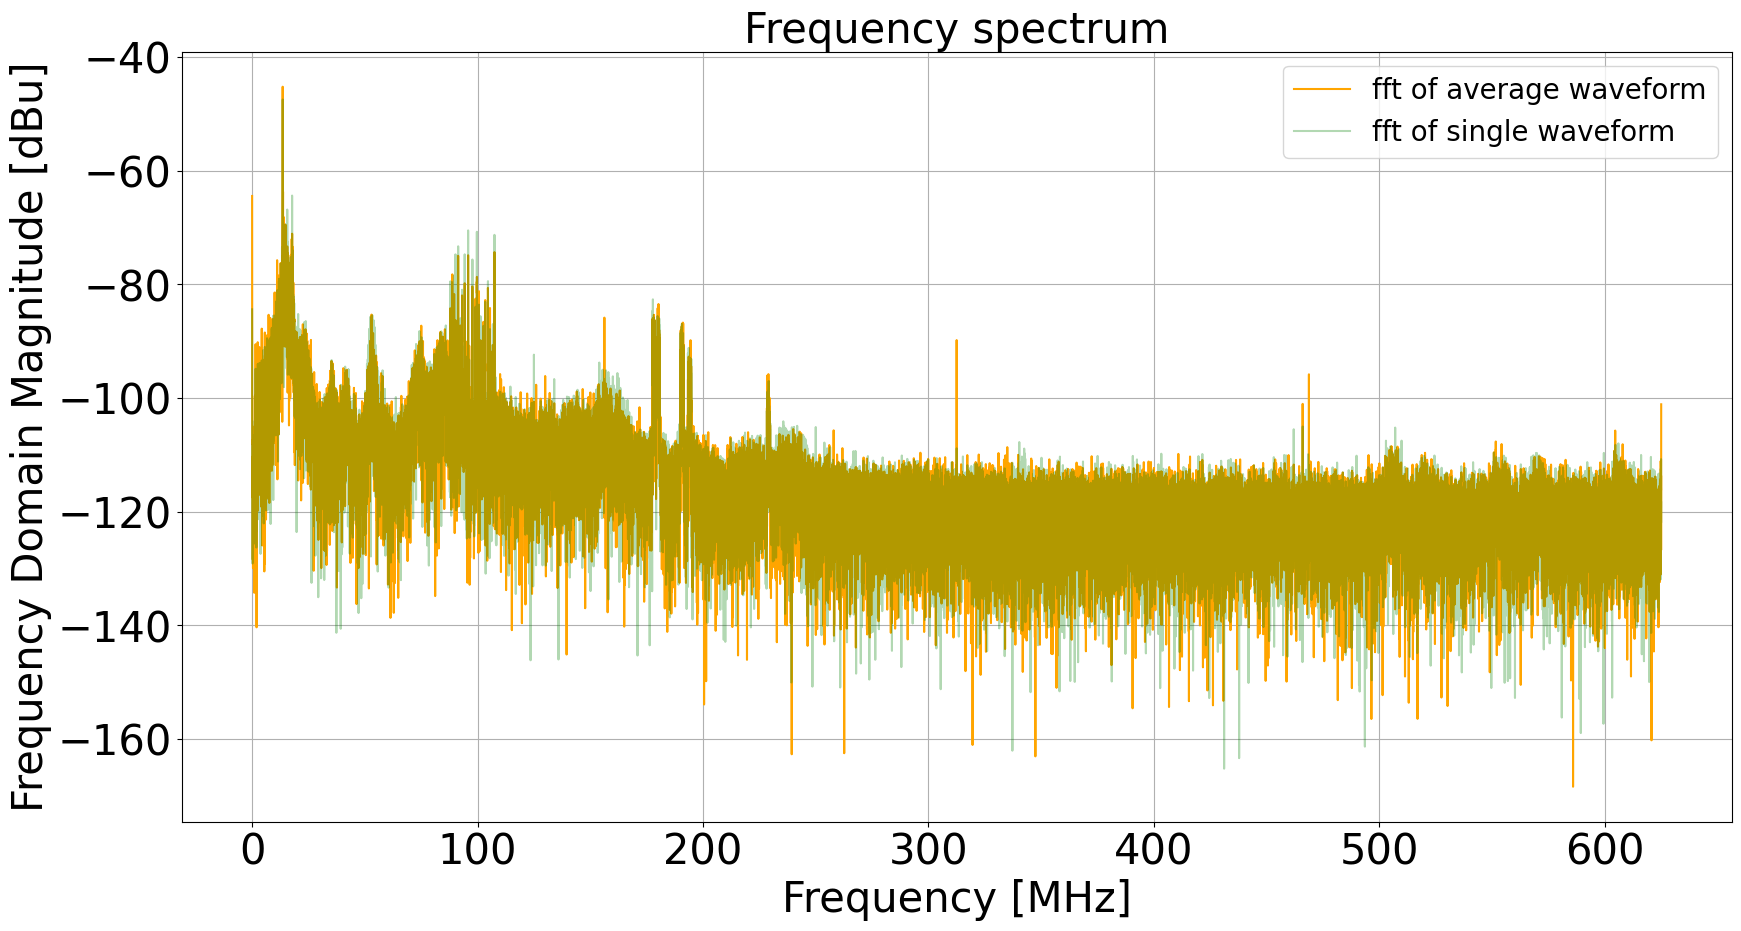

Execution time: 3.2208850383758545 seconds


In [110]:
plt.figure(figsize = (20, 10))
#plt.errorbar(freqs_A, Y_dBu, yerr = Y_err_dBu, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
plt.plot(freqs_A, Y_dBu_A - diff, color = 'orange', label = 'fft of average waveform')
plt.plot(freqs_A, Y_dBu_single_wf_A, alpha = 0.3, color = 'green', label = 'fft of single waveform')

plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [dBu]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.legend(fontsize = 20)
#plt.semilogx()
plt.show()

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

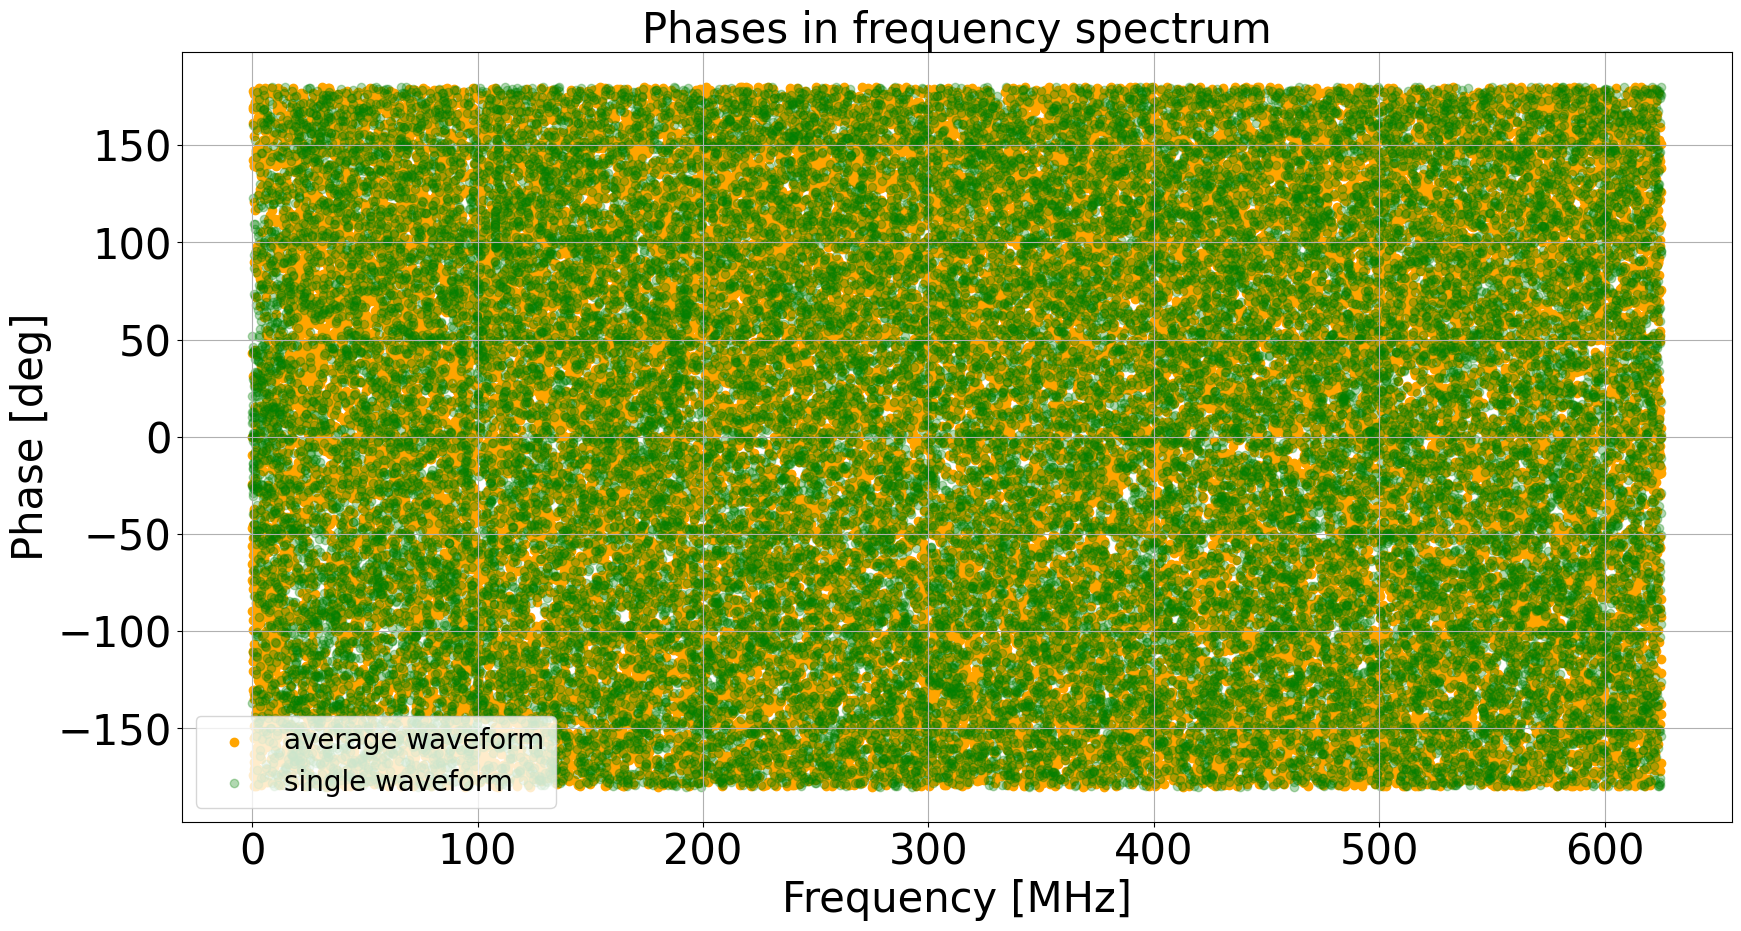

In [111]:
plt.figure(figsize = (20, 10))
plt.scatter(freqs_A, phases_A, color = 'orange', label = 'average waveform')
plt.scatter(freqs_A, phases_single_wf_A,  alpha = 0.3, color = 'green', label = 'single waveform')

plt.title('Phases in frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.ylabel('Phase [deg]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend(loc = 'best', fontsize = 20)
plt.grid(True)

#plt.savefig("080824_15.24/phase_of_avg_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("080824_14.24/phase_of_avg_fft.pdf", format = "pdf", bbox_inches="tight")

plt.show()

# Method B: Average of the phases of the ffts

In [112]:
file_pattern_wfs = f"../Waveforms/{day}/{day}_{hour}/{day}_{hour}_wf.csv/{day}_{hour}_wf_*.csv"
file_list_wfs = glob.glob(file_pattern_wfs)

amplitudes_list_B = []

if not file_list:
    print("No files found for the given pattern.")
else:
    for i, file in enumerate(file_list_wfs):
        df = pd.read_csv(file)
        if i == 0:
            print(df.iloc[:, 0])
            print(df.iloc[:, 1])
            times_B = pd.to_numeric(df.iloc[1:, 0], errors = 'coerce').values
        amplitudes_B = pd.to_numeric(df.iloc[1:, 1], errors='coerce').values
        amplitudes_list_B.append(amplitudes_B)
            
all_amplitudes_B = np.stack(amplitudes_list_B, axis = 0)
print(all_amplitudes_B)


0               (us)
1         0.00000000
2         0.00080000
3         0.00160000
4         0.00240000
            ...     
62500    49.99920067
62501    50.00000067
62502    50.00080067
62503    50.00160067
62504    50.00240067
Name: Time, Length: 62505, dtype: object
0               (mV)
1        -2.36220500
2        -2.36220500
3        -2.36220500
4        -1.57480300
            ...     
62500     1.18110200
62501     0.78740150
62502     0.39370070
62503     1.18110200
62504     1.96850400
Name: Channel D, Length: 62505, dtype: object
[[-2.362205  -2.362205  -2.362205  ...  0.3937007  1.181102   1.968504 ]
 [ 2.362205   2.362205   2.755905  ...  5.511811   5.11811    3.937008 ]
 [ 6.299212   6.692913   6.692913  ...  7.874015   7.480314   6.299212 ]
 ...
 [ 3.149606   2.362205   1.574803  ...  4.330709   3.937008   4.330709 ]
 [ 5.511811   6.692913   7.480314  ...  2.362205   2.362205   2.755905 ]
 [ 3.937008   7.086614   8.267716  ... -2.362205  -1.574803  -0.3937007]]


In [113]:
#The ADC of the Picoscope only represents discrete levels of input voltage in 8 bit resolution
conversion_factor = 0.001

### compute the FFTs

In [114]:
Ys_dBu_list = []
phases_list = []

for i in range(all_amplitudes_B.shape[0]):
    Y_dBu_B, phase_B = rfft(all_amplitudes_B[i, :], conversion_factor)
    Ys_dBu_list.append(Y_dBu_B)
    phases_list.append(phase_B)

Ys_dBu_B = np.stack(Ys_dBu_list, axis = 0)
phases_B = np.stack(phases_list, axis = 0)
print(f"Ys_dBu_B: {Ys_dBu_B}")
print(f"phases_B: {phases_B}")

y_windowed: [-2.362205  -2.362205  -2.362205  ...  0.3937007  1.181102   1.968504 ]
Y: [3891.7318749   +0.j           39.4017962 +133.56269241j
    6.67770023 +84.77136816j ...  -29.23322862 -34.32925455j
  -20.70254679 +25.07109002j   31.1023595   +0.j        ]
[   0.           73.5636243    85.49593685 ... -130.416202    129.54831882
    0.        ]
y_windowed: [2.362205 2.362205 2.755905 ... 5.511811 5.11811  3.937008]
Y: [2926.3778506   +0.j          149.56572238 +27.25114928j
  101.18925869+127.74544164j ...   30.08359034 -24.57725696j
   -7.35910867 +78.430855j    -58.6615224   +0.j        ]
[  0.          10.3261234   51.61667806 ... -39.24763878  95.36032641
 180.        ]
y_windowed: [6.299212 6.692913 6.692913 ... 7.874015 7.480314 6.299212]
Y: [3010.2355518  +0.j           10.41784046 -6.95512932j
  -43.25419861 -2.91085192j ...   48.19180466+69.99283649j
  -25.01760145+38.12500625j  222.0472078  +0.j        ]
[   0.          -33.72775453 -176.15000517 ...   55.45162428  123

### compute and plot the average fft and the average of their phases

In [115]:
span_B = times_B[len(times_B)-1] 
f_s_avg_fft = len(times_B) / span_B
print(f"f_s_avg_fft = {f_s_avg_fft}")
freqs_B = fft.rfftfreq(all_amplitudes_B.shape[1], 1/f_s_avg_fft) #window lenght, sample spacing

avg_fft_dBu_B = np.mean(Ys_dBu_B, axis = 0)
avg_phases_B = np.mean(phases_B, axis = 0)
print(f"avg_fft_dBu_B: {avg_fft_dBu_B}")
print(f"avg_phases_B: {avg_phases_B}")


f_s_avg_fft = 1250.0199822905822
avg_fft_dBu_B: [ -82.7658488  -113.73603207 -116.11800061 ... -120.72050319 -120.37200863
 -119.78835029]
avg_phases_B: [  0.          22.65026523  -4.82348132 ... -22.41007384 -16.52554765
  39.375     ]


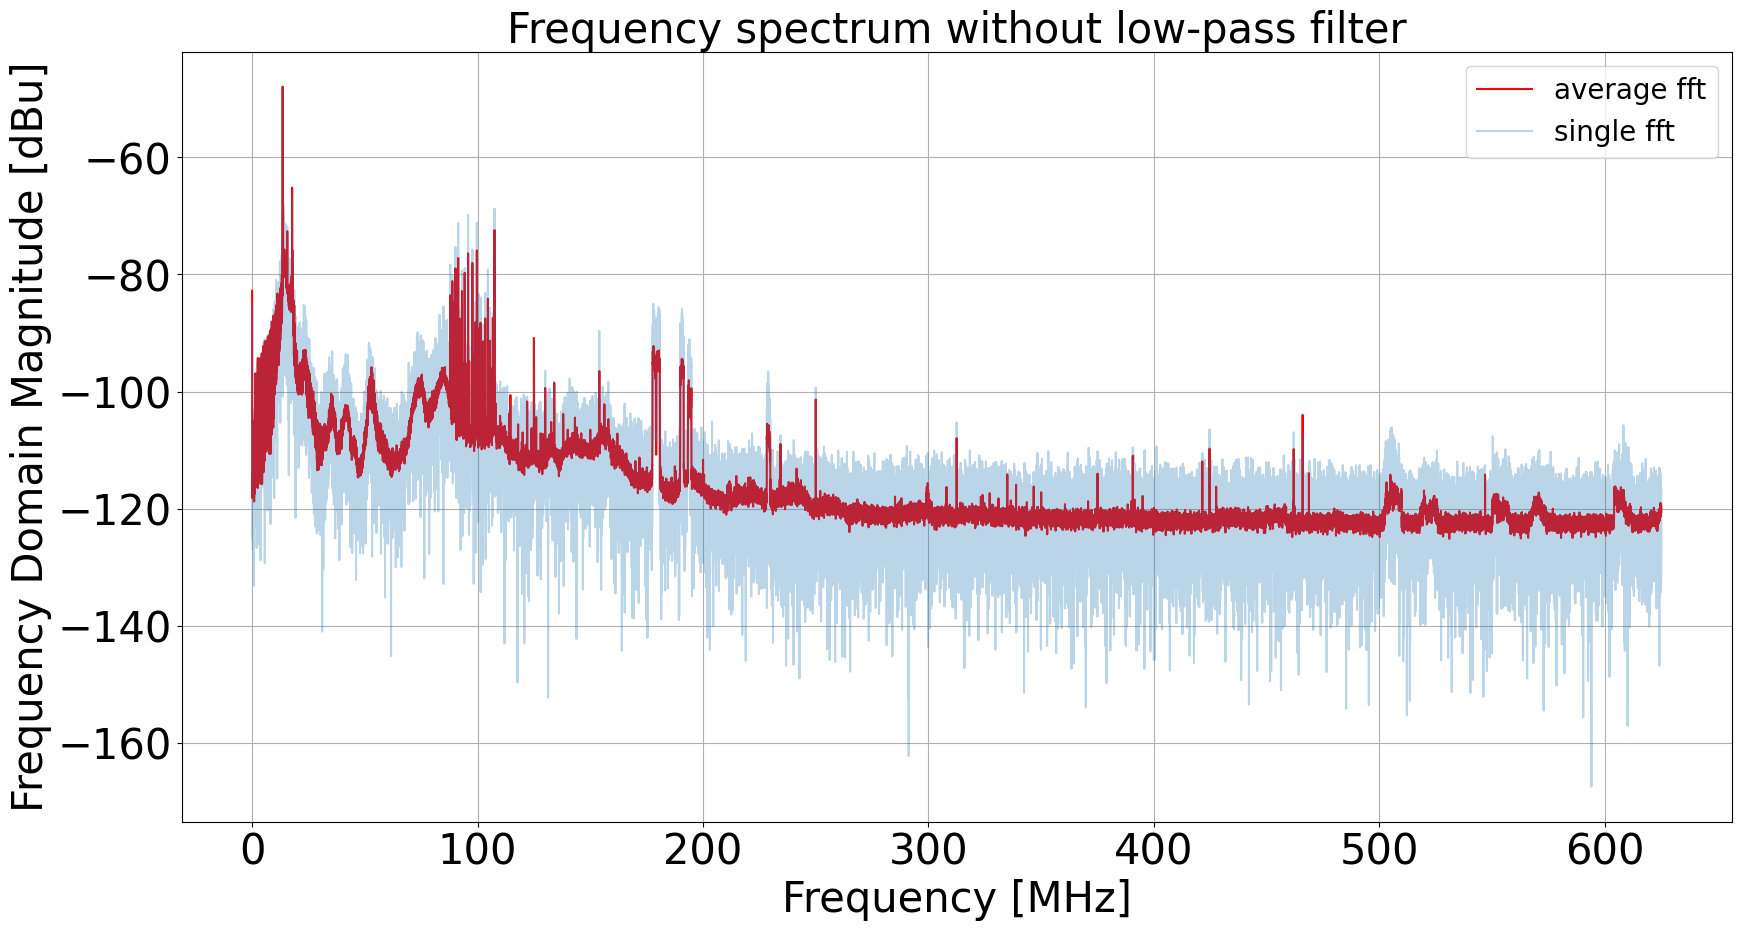

In [120]:
plt.figure(figsize=(20, 10))
#plt.errorbar(freqs_B, avg_fft_dBu, yerr = stds_fft_dBu, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
plt.plot(freqs_B, avg_fft_dBu_B, color = 'red', label = 'average fft')
plt.plot(freqs_B, Y_dBu_B, alpha = 0.3, label = 'single fft')
plt.title('Frequency spectrum without low-pass filter', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [dBu]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.legend(fontsize = 20)
#plt.semilogx()

plt.savefig("080824_16.07/fft_wo_lowpass.png", format = "png", bbox_inches="tight")
plt.savefig("080824_16.07/fft_wo_lowpass.pdf", format = "pdf", bbox_inches="tight")

plt.show()


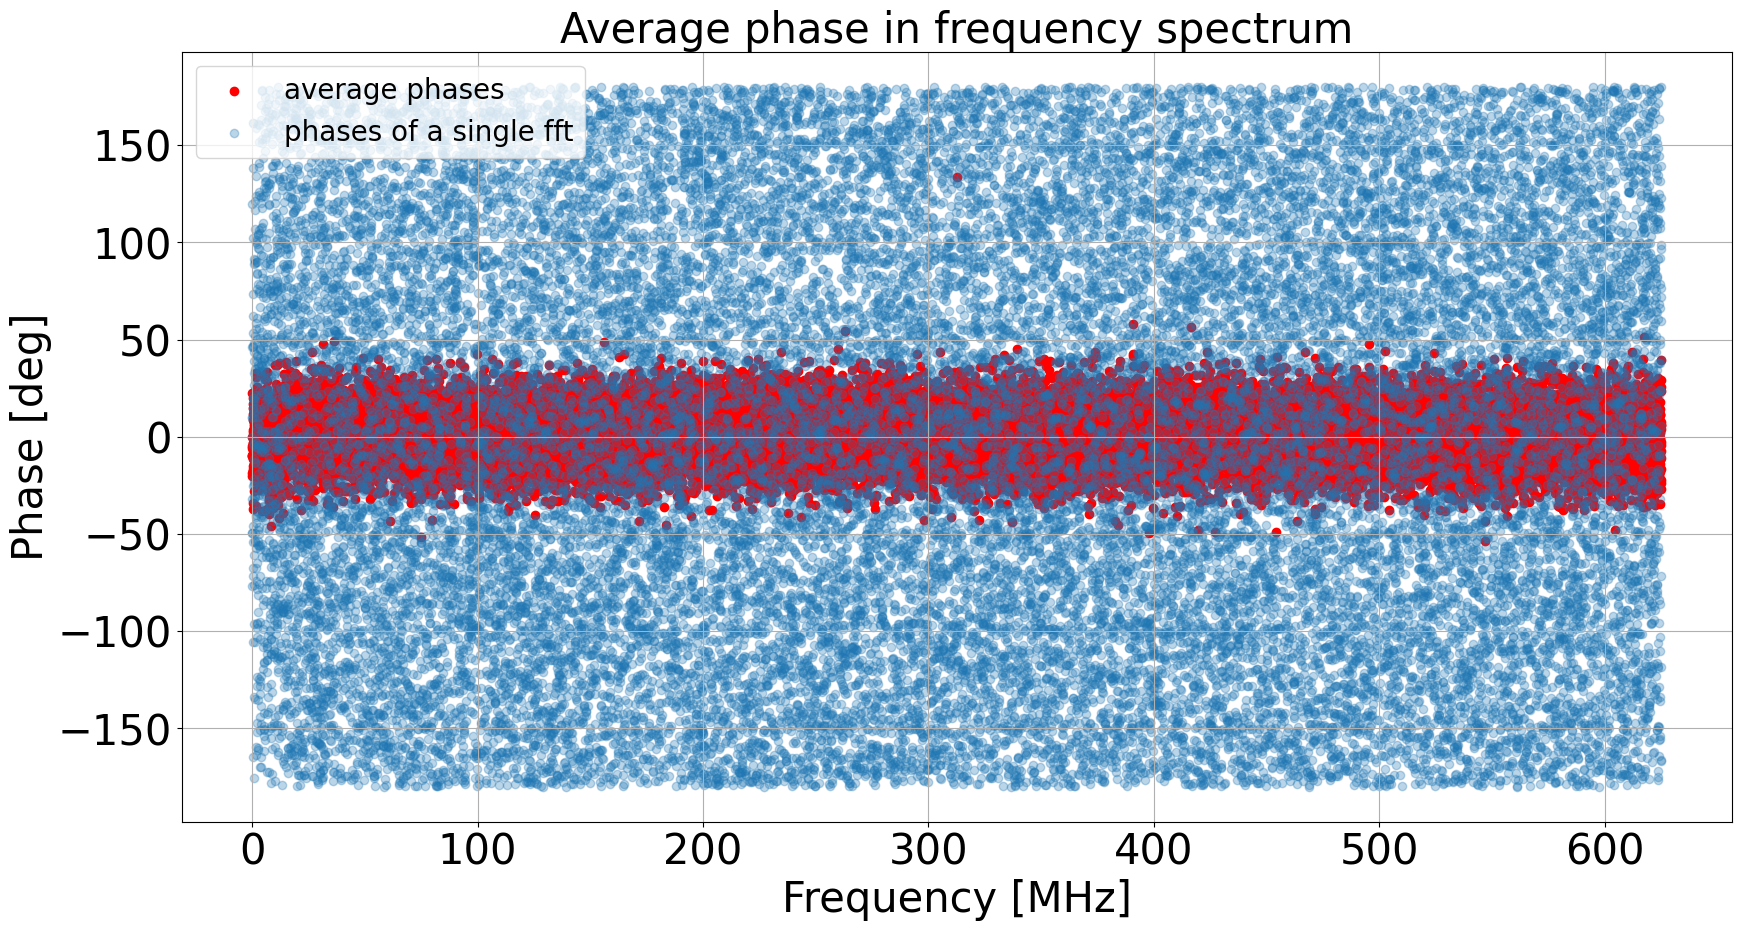

In [117]:
plt.figure(figsize=(20, 10))
#plt.errorbar(freqs_B, phases_avg, yerr = phases_err_avg, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
plt.scatter(freqs_B, avg_phases_B, color = 'red', label = 'average phases')
plt.scatter(freqs_B, phase_B, alpha = 0.3, label = 'phases of a single fft')
plt.title('Average phase in frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Phase [deg]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.legend(fontsize = 20, loc = 'best')
#plt.semilogx()

#plt.savefig("080824_14.24/avg_phases_B.png", format = "png", bbox_inches="tight")
#plt.savefig("080824_14.24/avg_phases_B.pdf", format = "pdf", bbox_inches="tight")

plt.show()


# Comparison between the two methods

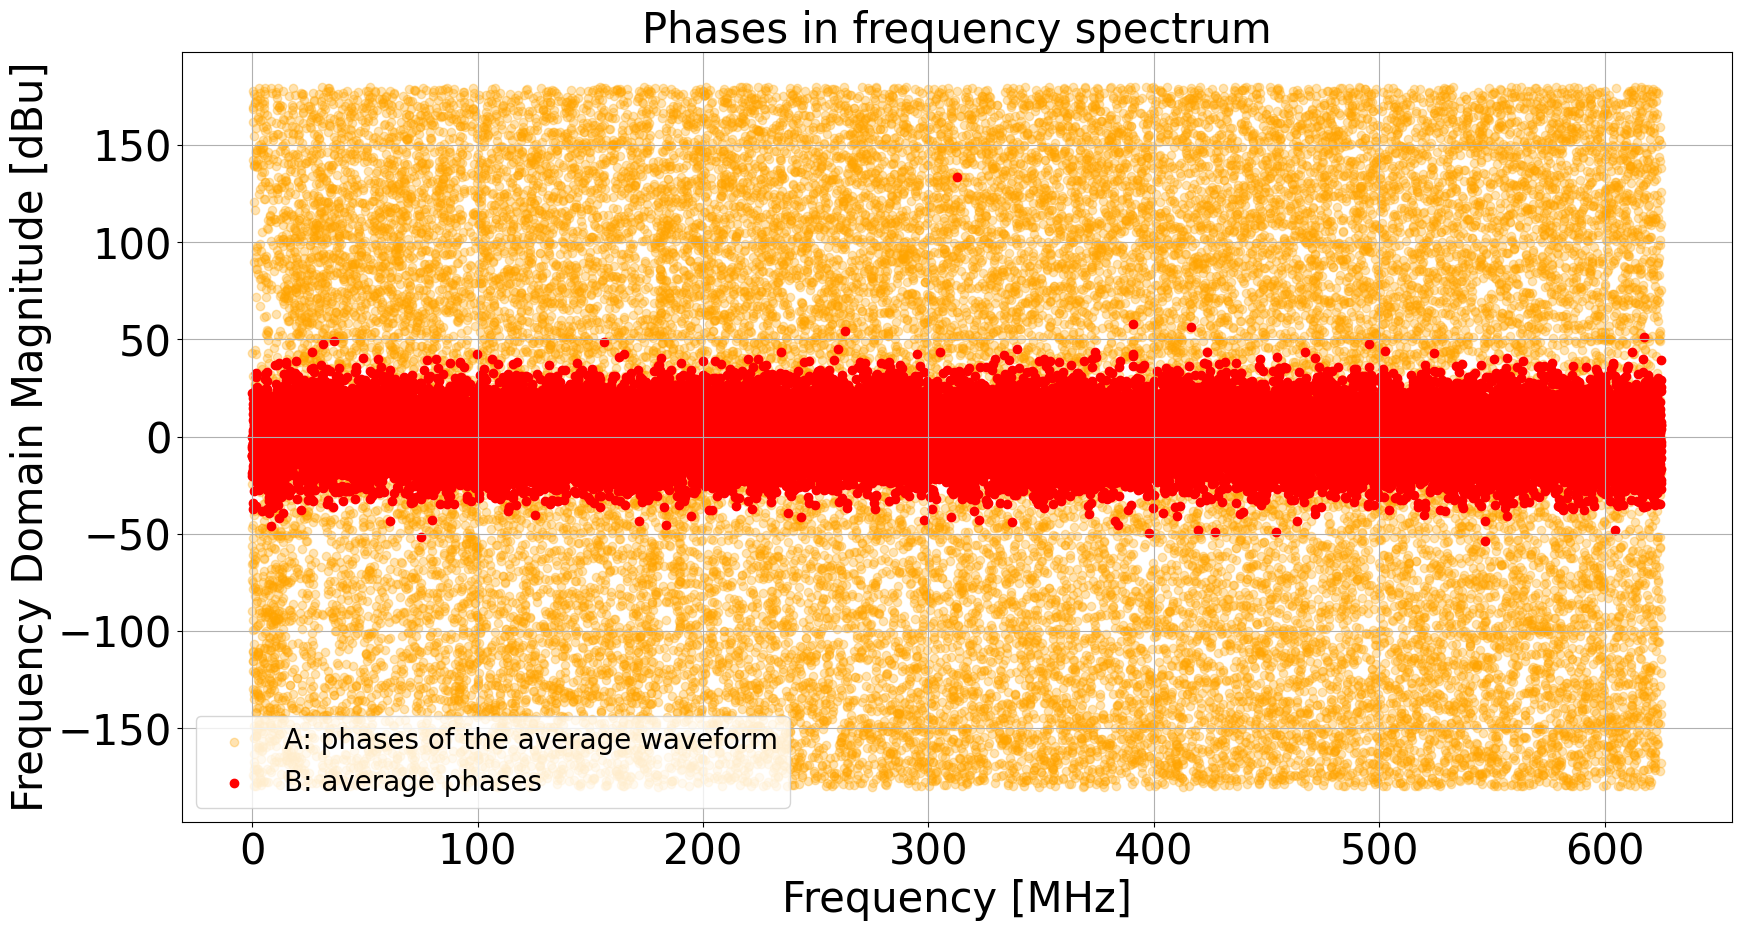

In [118]:
plt.figure(figsize=(20, 10))

#plt.errorbar(freqs, Y_dBu, yerr = Y_err_dBu, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
plt.scatter(freqs_A, phases_A, alpha = 0.3, color = 'orange', label = 'A: phases of the average waveform')
plt.title('Phases in frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [dBu]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
#plt.semilogx()

#---------------------------------------------------------------
#plt.errorbar(freqs, magnitudes_avg, yerr = errors, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
plt.scatter(freqs_B, avg_phases_B, color = 'red', label = 'B: average phases')

plt.legend(fontsize = 20, loc = 'best')
#plt.savefig("080824_14.24/A_VS_B_phases.png", format = "png", bbox_inches="tight")
#plt.savefig("080824_14.24/A_VS_B_phases.pdf", format = "pdf", bbox_inches="tight")

plt.show()